In [13]:
import astropy
from astropy.io import fits
from matplotlib import pyplot as plt

import numpy as np
import sys
import photutils
from photutils.centroids import centroid_quadratic

from photutils.profiles import RadialProfile
import os
np.set_printoptions(threshold=sys.maxsize)

from matplotlib import gridspec
import seaborn as sns

In [14]:
cd /Users/iman/Documents/cca_rsch/

/Users/iman/Documents/cca_rsch


In [15]:
fits_file = "member.uid___A001_X2fb_X200.ari_l.Betelgeuse_sci.spw0_1_2_3_4_338083MHz.12m.cont.I.pbcor.fits"

hdu = fits.open(fits_file, mode= 'update')
data = fits.getdata(fits_file)

CRDELT1 and CRDELT2 not in header...

In [16]:
highfile = "hr_member.uid___A001_X2de_Xf7.ari_l.Betelgeuse_sci.spw0_1_2_3_4_338086MHz.12m.cont.I.pbcor.fits"

hduhr = fits.open(highfile, mode= 'update')
datahr = fits.getdata(highfile)

(1253.0, 1293.0)

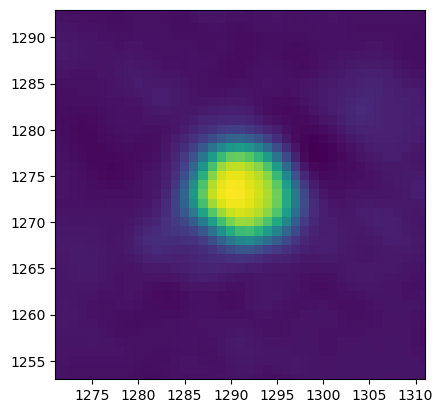

In [40]:
w = 20

plt.imshow(datahr[0,0,:,:])#, vmin=-0.0003752211, vmax=0.0003752211)

# center on ds9 at (443.04628, 439.97236)
# note: this appears to be different than the dataset
x2 = 1291
y2 = 1273


plt.xlim(x2-w, x2+w)
plt.ylim(y2-w, y2+w)

look better in ds9

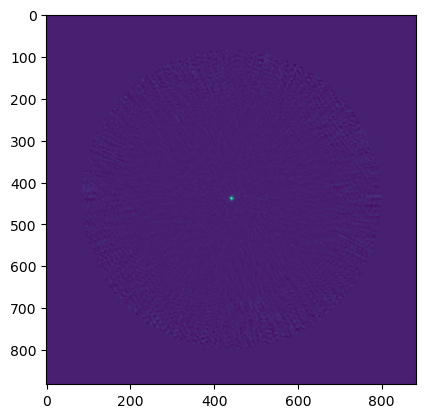

In [41]:
w = 5
plt.imshow(data[0,0,:,:])
# center on ds9 at (443.04628, 439.97236)
# note: this appears to be different than the dataset
x = 442
y = 439

#plt.xlim(x-w, x+w)
#plt.ylim(y-w, y+w)

## using photoutils instead

In [42]:
# explicit function to normalize array
def normalize_2d(matrix):
    norm = np.linalg.norm(matrix)
    matrix = matrix/norm  # normalized matrix
    return matrix



In [43]:
dlr = data[0,0,:,:]
dhr = datahr[0,0,:,:]

In [44]:
dlr_norm = normalize_2d(dlr)
dhr_norm = normalize_2d(dhr)

In [45]:
dlr[np.isnan(dlr)] = 0
dhr[np.isnan(dhr)] = 0


In [46]:
w=2
dlr[x-w:x+w,y-w:y+w]

array([[0.03573568, 0.07173775, 0.12242415, 0.17868812],
       [0.02683344, 0.05478429, 0.09435256, 0.13836412],
       [0.01882958, 0.03753125, 0.06410725, 0.09369487],
       [0.01277135, 0.02357114, 0.03904661, 0.05643921]], dtype=float32)

In [47]:
np.nanmax(dlr)

0.26078528

In [48]:
np.where(dlr==np.nanmax(dlr))

(array([439]), array([442]))

In [64]:
x= 439
y = 442
w=20
dlrcrop = dlr[x-w:x+w,y-w:y+w]

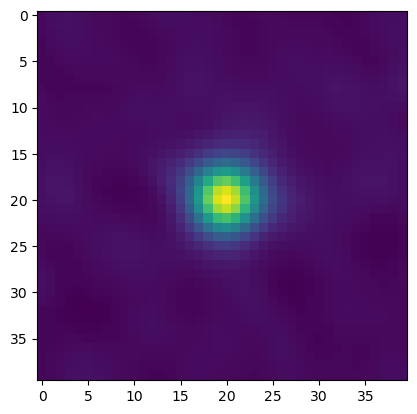

In [65]:
w = 20
x = 442
y = 439
plt.imshow(dlrcrop)#y-w:y+w])#, vmin=-0.0003752211, vmax=0.0003752211)
#plt.imshow(dlr_norm)
xlr = 22
ylr = 19

#plt.xlim(xlr-w, xlr+w)
#plt.ylim(ylr-w, ylr+w)

In [66]:
np.where(dlrcrop==0.26078528)

(array([20]), array([20]))

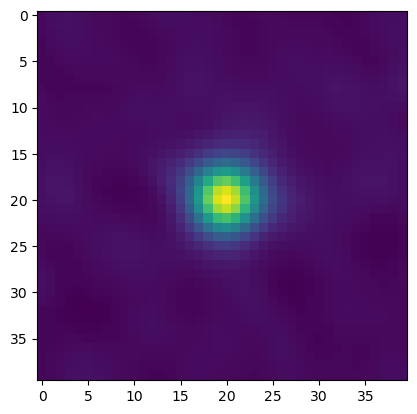

In [67]:
plt.imshow(dlrcrop)

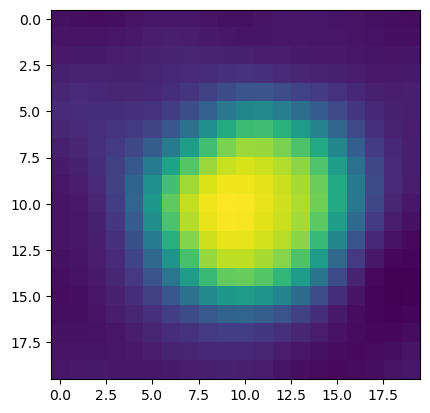

In [68]:
w = 10
# x2=1291
# y2 = 1273

x2=1273
y2 = 1291
plt.imshow(dhr[x2-w:x2+w,y2-w:y2+w])#, vmin=-0.0003752211, vmax=0.0003752211)
#plt.imshow(dhr[1271:1311,1253:1293])
#plt.imshow(dhr_norm)

# center on ds9 at (443.04628, 439.97236)
# note: this appears to be different than the dataset
#xlr = 13
#ylr = 8

#plt.xlim(x2-w, x2+w)
#plt.ylim(y2-w, y2+w)

#plt.xlim(xlr-w, xlr+w)
#plt.ylim(ylr-w, ylr+w)

In [69]:
w=50

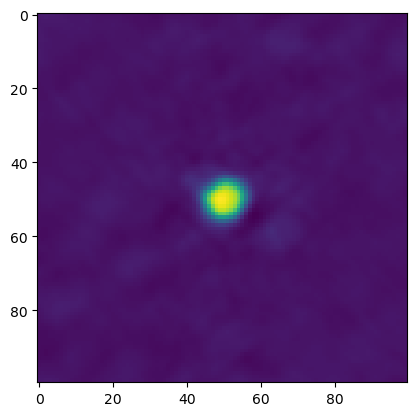

In [70]:
plt.imshow(dhr[x2-w:x2+w,y2-w:y2+w])


In [72]:
dhrcrop = dhr[x2-w:x2+w,y2-w:y2+w]

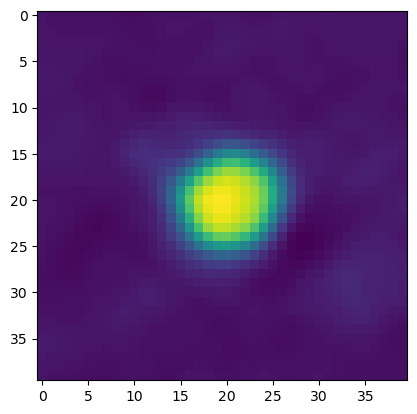

In [73]:
w=20
dhrcrop = dhr[x2-w:x2+w,y2-w:y2+w]
#plt.imshow(dhr[x2-w:x2+w,y2-w:y2+w])
plt.imshow(dhrcrop)

In [74]:
np.where(dhrcrop==0.061495353)
dhrcrop[20,19]

0.061495353

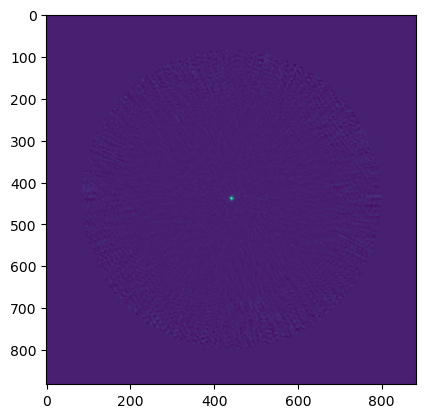

In [75]:
plt.imshow(dlr)

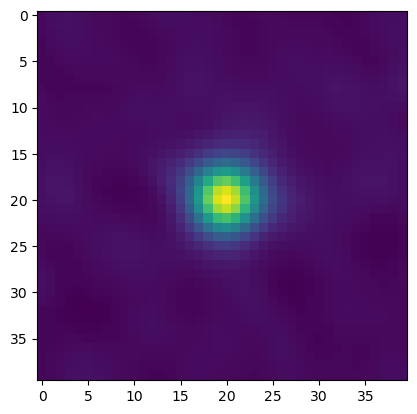

In [76]:
plt.imshow(dlrcrop)

In [77]:
w=20
xycen = centroid_quadratic(dlrcrop, xpeak=20, ypeak=20)
edge_radii = np.arange(w)

rp = RadialProfile(dlrcrop, xycen, edge_radii)

In [118]:
edge_radii

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [78]:
w=20
xycenhr = centroid_quadratic(dhrcrop, xpeak=20, ypeak=20)
edge_radiihr = np.arange(w)

rphr = RadialProfile(dhrcrop, xycenhr, edge_radiihr)

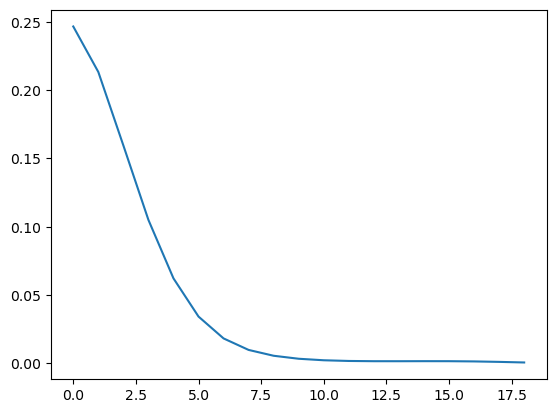

In [79]:
plt.plot(rp.profile)

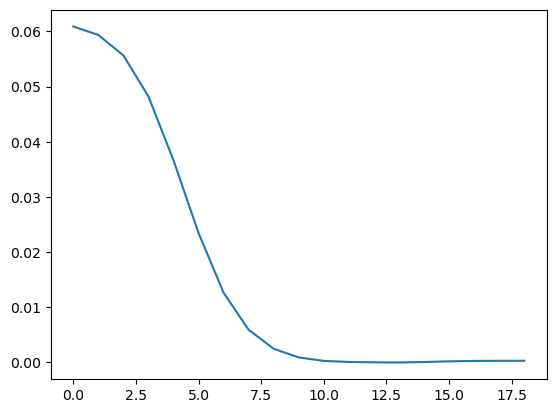

In [80]:
plt.plot(rphr.profile)

In [81]:
w = 10
x_lr_bk=525
y_lr_bk=330

lr_err = np.abs(np.nanmean(dlr_norm[x_lr_bk-w:x_lr_bk+w, y_lr_bk-w:y_lr_bk+w]))
lr_err

7.1040167e-06

In [82]:
from astropy.stats import sigma_clipped_stats
mean, median_lr, std = sigma_clipped_stats(dlr_norm, sigma=3.0)
print((mean, median_lr, std)) 

(-1.9814922779914923e-05, 0.0, 0.0005846459534950554)


In [83]:
w = 10
x_hr_bk=1650
y_hr_bk=600

hr_err = np.abs(np.nanmean(dhr[x_hr_bk-w:x_hr_bk+w, y_hr_bk-w:y_hr_bk+w]))
hr_err

3.6541504e-05

In [84]:
mean_hr, median_hr, std_hr = sigma_clipped_stats(dhr_norm, sigma=3.0)
print((mean_hr, median_hr, std_hr)) 

(-2.8721628950734157e-06, -7.094823558873031e-06, 0.00032435834873467684)


In [85]:
rp.profile

array([0.24673643, 0.21339759, 0.15954176, 0.10497327, 0.06213313,
       0.03413239, 0.01811798, 0.00968798, 0.00540747, 0.00321554,
       0.00210937, 0.00160101, 0.00142492, 0.00141356, 0.00145116,
       0.00143276, 0.00126616, 0.00092648, 0.00048966])

In [86]:
xs = np.linspace(0,8,9)

# Radial Profile

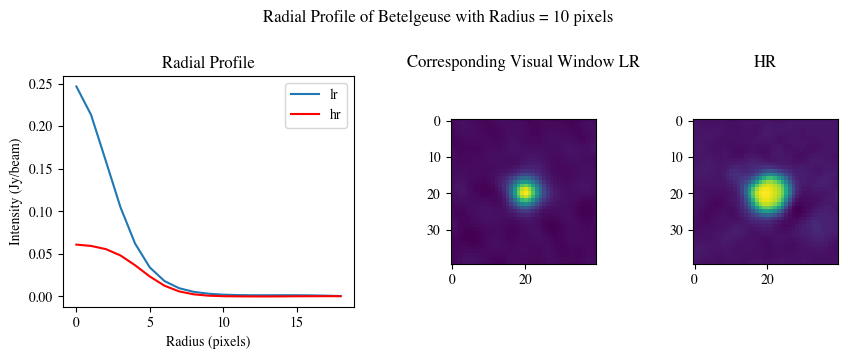

In [87]:
fig = plt.figure()
fig.set_figheight(3)
fig.set_figwidth(10)
plt.rcParams["font.family"] = "Times"

spec = gridspec.GridSpec(ncols=3, nrows=1,width_ratios=[2,1,1], hspace = 0.5, wspace = 0.5)

ax1 = fig.add_subplot(spec[0])
ax2 = fig.add_subplot(spec[1])
ax3 = fig.add_subplot(spec[2])
fig.suptitle(f'Radial Profile of Betelgeuse with Radius = {w} pixels', y =1.1)

ax1.plot(rp.profile, label = 'lr')
ax1.plot(rphr.profile,label = 'hr', color = 'red')
ax1.legend()
ax1.set_title("Radial Profile")

ax2.imshow(dlrcrop)
ax2.set_title("Corresponding Visual Window LR", y=1.3)

ax3.imshow(dhrcrop)
#ax3.set_ylim(100-w, 100+w)
ax3.set_title("HR", y=1.3)
ax1.set_xlabel("Radius (pixels)")
ax1.set_ylabel("Intensity (Jy/beam)")
#ax2.axis("off")

sns.set_style("dark")


In [88]:
#CRDELT1 and CRDELT2
lrc1 = 3600*hdu[0].header['CDELT1']
lrc2 = 3600*hdu[0].header['CDELT2']
#CRDELT1 and CRDELT2
hrc1 = 3600*hduhr[0].header['CDELT1']
hrc2 = 3600*hduhr[0].header['CDELT2']

In [89]:
dist1 = 168
dist2 = 222

def pixarc(res, X):
    V = (res*X)
    V= np.round(V,5)
    return V

# small angle
def sm(dist, ang_size):
    diam = (ang_size*dist)/206265
    diam = np.round(diam,5)

    return diam

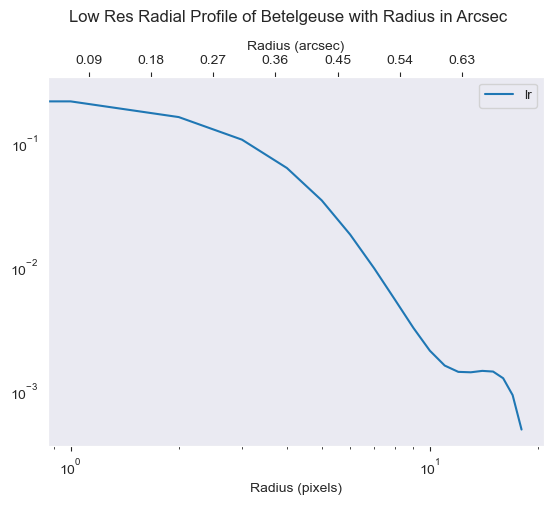

In [90]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
fig.suptitle(f'Low Res Radial Profile of Betelgeuse with Radius in Arcsec', y =1.02)
ax1.loglog(rp.profile, label = 'lr')
ax1.legend()
ax1.set_xlabel("Radius (pixels)")

pix_ticks = np.array([2.5, 5, 7.5, 10, 12.5, 15, 17.5])
lrarc = pixarc(lrc2, pix_ticks)

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(pix_ticks)
ax2.set_xticklabels(lrarc)
ax2.set_xlabel(r"Radius (arcsec)")
plt.show()

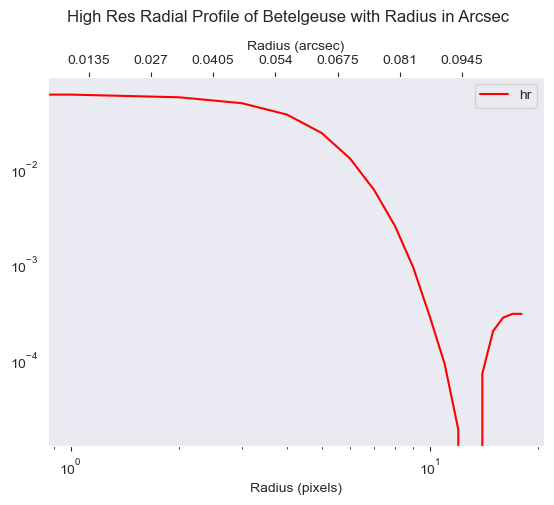

In [91]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

fig.suptitle(f'High Res Radial Profile of Betelgeuse with Radius in Arcsec', y =1.02)

ax1.loglog(rphr.profile, label = 'hr', color = 'red')
ax1.legend()
ax1.set_xlabel("Radius (pixels)")

pix_ticks = np.array([2.5, 5, 7.5, 10, 12.5, 15, 17.5])
hrarc = pixarc(hrc2, pix_ticks)

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(pix_ticks)
ax2.set_xticklabels(hrarc)
ax2.set_xlabel(r"Radius (arcsec)")
plt.show()

<Axes: >

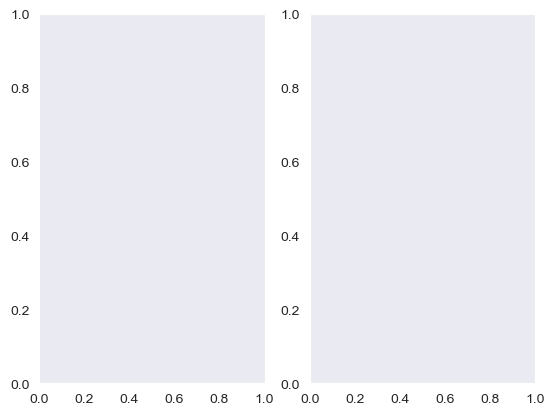

In [92]:
plt.subplot(1, 2, 1)

...

plt.subplot(1, 2, 2)

# small angle

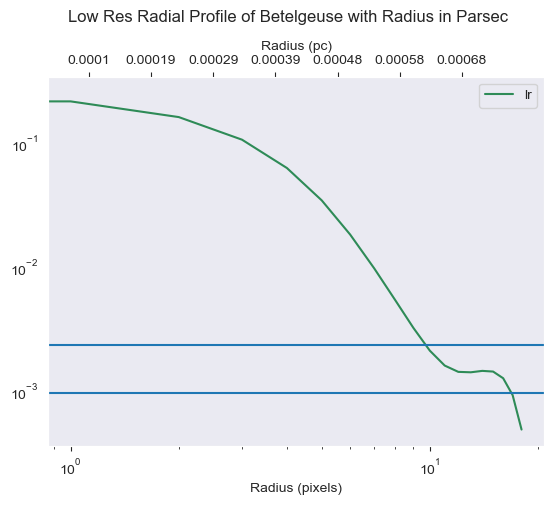

In [99]:
lrpc1 = sm(dist1, lrarc)
lrpc2 = sm(dist2, lrarc)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
fig.suptitle(f'Low Res Radial Profile of Betelgeuse with Radius in Parsec', y =1.02)
ax1.loglog(rp.profile, label = 'lr', c = 'seagreen')
ax1.legend()
ax1.set_xlabel("Radius (pixels)")

ax1.axhline(bkg.background_median)
ax1.axhline(bkg.background_rms_median)

pix_ticks = np.array([2.5, 5, 7.5, 10, 12.5, 15, 17.5])

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(pix_ticks)
ax2.set_xticklabels(lrpc2)
ax2.set_xlabel(r"Radius (pc)")
plt.show()

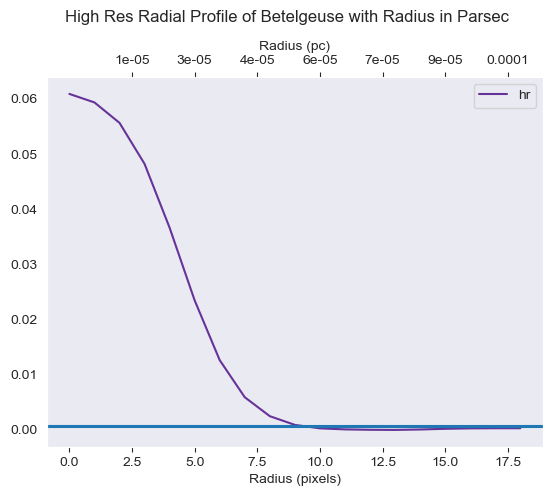

In [108]:
hrpc1 = sm(dist1, hrarc)
hrpc2 = sm(dist2, hrarc)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
fig.suptitle(f'High Res Radial Profile of Betelgeuse with Radius in Parsec', y =1.02)
ax1.plot(rphr.profile, label = 'hr', c = 'rebeccapurple')
ax1.legend()
ax1.set_xlabel("Radius (pixels)")

ax1.axhline(bkghr.background_median)
ax1.axhline(bkghr.background_rms_median)


ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(pix_ticks)
ax2.set_xticklabels(hrpc2)
ax2.set_xlabel(r"Radius (pc)")
plt.show()

In [117]:
rphr.profile

array([ 6.09001719e-02,  5.93588985e-02,  5.56591398e-02,  4.82224008e-02,
        3.66498993e-02,  2.34802827e-02,  1.26448205e-02,  5.91977545e-03,
        2.48603796e-03,  9.05529668e-04,  2.79034033e-04,  8.87247289e-05,
        1.83070993e-05, -7.21581260e-06,  7.05245078e-05,  1.97379540e-04,
        2.72983523e-04,  2.98929515e-04,  2.98563042e-04])

In [104]:
print("Set distance to seismic 168 pc: ", sm(168, 9))
print("Set distance to radio 222 pc ", sm(222, 9))

Set distance to seismic 168 pc:  0.00733
Set distance to radio 222 pc  0.00969


CRDELT1 and CRDELT2 are the RA and DEC pixel sizes, in degrees (CUNIT1 = 'deg  ')

In [115]:
beta= 1.4
k160 = 8.8
h = 1
kb = 1
c = 3*10**8 #m/s
rhr = 5*10**(-5) #pc hr radius
lmda = 887 #microns

# to find density
def density(Sarr, Rarr):
    '''
    turns intensity into density. 
    lmda = wavelength
    Sarr = intensity array profile
    Rarr = radii
    '''
    T = temp(Rarr)
    B = Blmd(lmda, T)
    kpa = kappa(lmda)

    sigma = Sarr/(kpa*B)
    return sigma

def kappa(lmda):
    k = k160*(lmda/160)**(-1*beta)
    return k

def Blmd(lmda, T):
    B = (2*h*c/lmda)/(np.exp((h*c)/(lmda*kb*T))-1)
    return B

def temp(Rarr):
    Tin = 1300
    Rin = 3* rhr

    T = Tin*(Rarr/Rin)**(1/2)
    return T


In [116]:
kappa(870)

0.8220981941175104

### background

In [97]:
from astropy.stats import SigmaClip
from photutils.background import Background2D, MedianBackground
sigma_clip = SigmaClip(sigma=3.0)
bkg_estimator = MedianBackground()
bkg = Background2D(dlrcrop, (10, 10), filter_size=(3, 3),
                   sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)

print(bkg.background_median)  
print(bkg.background_rms_median)

0.0009634753754300995
0.00234179871828971


In [98]:
sigma_clip = SigmaClip(sigma=3.0)
bkg_estimator = MedianBackground()
bkghr = Background2D(dhrcrop, (10, 10), filter_size=(3, 3),
                   sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)

print(bkghr.background_median)  
print(bkghr.background_rms_median)


0.0005529984133683773
0.0006795493783196738


### steps, radius

In [105]:
#code function to find fold difference between steps
def step(arr):
    steps = [0]*(len(arr)-1)

    for i in range(len(arr)-1):
        steps[i] = arr[i]-arr[i+1]

    return steps

stephr = step(rphr.profile)
steplr = step(rp.profile)

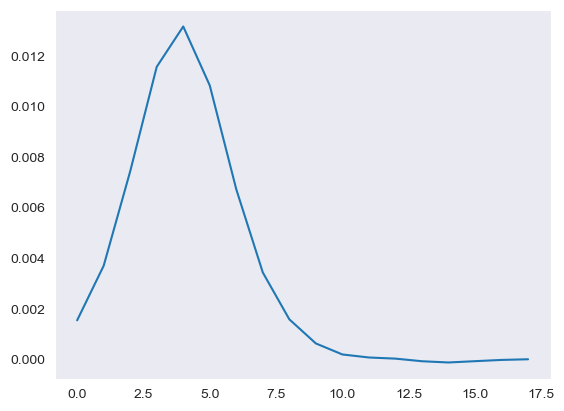

In [106]:
plt.plot(step(rphr.profile))

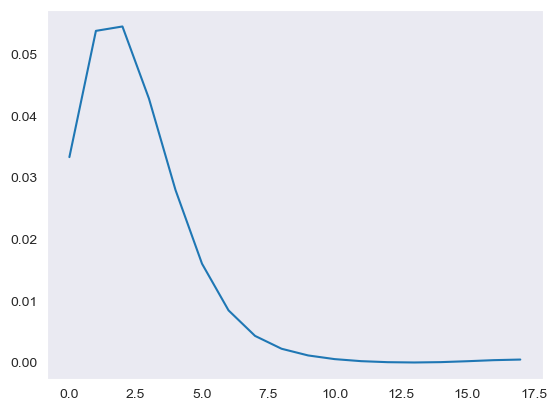

In [107]:
plt.plot(step(rp.profile))

In [ ]:
print(stephr[10], steplr[10])

0.00019030930375548685 0.00050836726831653


ValueError: 'positions' must not contain any non-finite (e.g., NaN or inf) positions

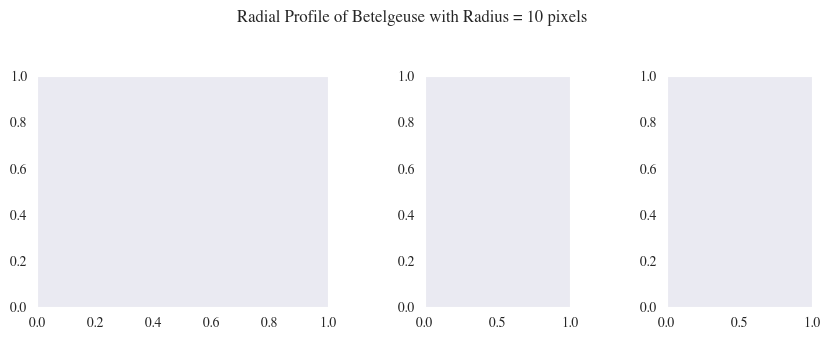

In [104]:
fig = plt.figure()
fig.set_figheight(3)
fig.set_figwidth(10)
plt.rcParams["font.family"] = "Times"

spec = gridspec.GridSpec(ncols=3, nrows=1,width_ratios=[2,1,1], hspace = 0.5, wspace = 0.5)

ax1 = fig.add_subplot(spec[0])
ax2 = fig.add_subplot(spec[1])
ax3 = fig.add_subplot(spec[2])


fig.suptitle(f'Radial Profile of Betelgeuse with Radius = {w} pixels', y =1.1)
ax1.plot(rpbklr.profile)
ax1.plot(rpbkhr.profile)
ax1.set_title("Radial Profile")
ax2.imshow(data[0,0,:,:])
ax2.set_xlim(x-w, x+w)
ax2.set_ylim(y-w, y+w)
ax2.set_title("Corresponding Visual Window BK LR", y=1.3)
ax3.imshow(datahr[0,0,:,:])
ax3.set_xlim(x2-w, x2+w)
ax3.set_ylim(y2-w, y2+w)
ax3.set_title("BK HR", y=1.3)
ax1.set_xlabel("Radius (pixels)")
ax1.set_ylabel("Intensity (Jy/beam)")
#ax2.axis("off")

sns.set_style("dark")


In [ ]:
def radial_profile(w, x=442, y=439, data=data):
    
    ######## calculate
    
    radii = []

    for i in range(x,x+w,1): # 442 to the end
        for j in range(y,y+w,1): # 339 to the end
            r = np.sqrt((x-i)**2+(y-j)**2)

            if r not in radii:
                radii.append(r)
    
    radii.sort()
    
    intensity = [0]*len(radii)

    for i in range(x,x+w,1): # 442 to the end
        for j in range(y,y+w,1): # 339 to the end
            r = np.sqrt((x-i)**2+(y-j)**2)

            intensity[radii.index(r)] += data[0,0,i,j]

    ######## plot
    
    fig = plt.figure()
    fig.set_figheight(3)
    fig.set_figwidth(8)
    plt.rcParams["font.family"] = "Times"

    spec = gridspec.GridSpec(ncols=2, nrows=1,width_ratios=[3, 1], hspace = 0.5, wspace = 0.2)
    
    ax1 = fig.add_subplot(spec[0])
    ax2 = fig.add_subplot(spec[1])
    
    fig.suptitle(f'Radial Profile of Betelgeuse with Radius = {w} pixels', y =1.1)
    ax1.plot(radii,intensity)
    ax1.set_title("Radial Profile")
    ax2.imshow(data[0,0,:,:])
    ax2.set_xlim(x-w, x+w)
    ax2.set_ylim(y-w, y+w)
    ax2.set_title("Corresponding Visual Window", y=1.3)
    ax1.set_xlabel("Radius (pixels)")
    ax1.set_ylabel("Intensity (Jy/beam)")
    ax2.axis("off")
    
    sns.set_style("dark")

    

In [ ]:
data[0,0,i,j]

In [ ]:
np.max(data)

In [ ]:
def radial_profile2(w, x=442, y=439, data=data):
    
    ######## calculate
    
    radii = []

    #finding radii
    for i in range(x-w,x+w,1): # 442 to the end
        for j in range(y-w,y+w,1): # 339 to the end
            r = np.sqrt((x-i)**2+(y-j)**2)

            if r not in radii:
                radii.append(r)
    
    radii.sort()
    
    sum_intensity = [0]*len(radii)
    counts = [0]*len(radii)
    avg_intensity = [0]*len(radii)
    

    for i in range(x-w,x+w,1): # 442 to the end
        for j in range(y-w,y+w,1): # 339 to the end
            r = np.sqrt((x-i)**2+(y-j)**2)
            
            sum_intensity[radii.index(r)] += data[0,0,i,j]
            counts[radii.index(r)] += 1
            
    for i in range(len(avg_intensity)):
        avg_intensity[i] = sum_intensity[i]/counts[i]

    ######## plot
    
    fig = plt.figure()
    fig.set_figheight(3)
    fig.set_figwidth(8)
    plt.rcParams["font.family"] = "Times"

    spec = gridspec.GridSpec(ncols=2, nrows=1,width_ratios=[3, 1], hspace = 0.5, wspace = 0.2)
    
    ax1 = fig.add_subplot(spec[0])
    ax2 = fig.add_subplot(spec[1])
    
    fig.suptitle(f'Radial Profile of Betelgeuse with Radius = {w} pixels', y =1.1)
    ax1.plot(radii,avg_intensity)
    ax1.set_title("Radial Profile")
    ax2.imshow(data[0,0,:,:])
    ax2.set_xlim(x-w, x+w)
    ax2.set_ylim(y-w, y+w)
    ax2.set_title("Corresponding Visual Window", y=1.3)
    ax1.set_xlabel("Radius (pixels)")
    ax1.set_ylabel("Intensity (Jy/beam)")
    ax2.axis("off")
    
    sns.set_style("dark")

    

In [29]:
radial_profile2(11,442,439)

NameError: name 'radial_profile2' is not defined

In [ ]:
radial_profile2(11,442,439, data = datahr)

In [ ]:
radial_profile(12)

In [ ]:
radial_profile(15)

In [ ]:
def radial_profile_list(w, x=442, y=439, data=data):
    
    radlist = [None]*len(w)
    intlist = [None]*len(w)
    
    ######## calculate
    c = 0
    
    for i in w:
        
        radii = []

        for i in range(x,x+w,1): # 442 to the end
            for j in range(y,y+w,1): # 339 to the end
                r = np.sqrt((x-i)**2+(y-j)**2)

                if r not in radii:
                    radii.append(r)

        radii.sort()

        intensity = [0]*len(radii)

        for i in range(x,x+w,1): # 442 to the end
            for j in range(y,y+w,1): # 339 to the end
                r = np.sqrt((x-i)**2+(y-j)**2)

                intensity[radii.index(r)] += data[0,0,i,j]
                
        radlist[c] = radii
        intlist[c] = intensity
        c+=1

    ######## plot
    
    fig = plt.figure()
    fig.set_figheight(3)
    fig.set_figwidth(8)
    plt.rcParams["font.family"] = "Times"

    spec = gridspec.GridSpec(ncols=2, nrows=3,width_ratios=[3, 1], hspace = 0.5, wspace = 0.2)
    
    ax1 = fig.add_subplot(spec[0])
    ax2 = fig.add_subplot(spec[1])
    
    fig.suptitle(f'Radius = {w}', y =1.1)
    ax1.plot(radii,intensity)
    ax1.set_title("Radial Profile")
    ax2.imshow(data[0,0,:,:])
    ax2.set_xlim(x-w, x+w)
    ax2.set_ylim(y-w, y+w)
    ax2.set_title("Corresponding Visual Window", y=1.3)
    ax1.set_xlabel("Radius (pixels)")
    ax1.set_ylabel("Intensity (Jy/beam)")
    ax2.axis("off")
    
    sns.set_style("dark")

    